# 📊 Analyze Activity Metrics

Quick analysis and visualization of satellite-derived activity metrics.

**Run this after Inference_Satellite_Activity.ipynb**

## What This Does:
- Loads extracted activity metrics
- Generates time series visualizations
- Analyzes COVID-19 impact
- Compares locations
- Produces summary statistics

## Outputs:
- Charts in `results/activity_analysis/`
- Summary statistics

---

## 1. Setup & Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Imports successful")

✅ Imports successful


## 2. Configuration

In [5]:
# Paths
PROJECT_ROOT = Path.cwd().parent
FEATURES_DIR = PROJECT_ROOT / "data" / "features" / "satellite"
OUTPUT_DIR = PROJECT_ROOT / "results" / "activity_analysis"

# Create output directory
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

print(f"📁 Input: {FEATURES_DIR}")
print(f"📁 Output: {OUTPUT_DIR}")

📁 Input: D:\MS\UMD\Courses\Fall-2025\DATA-650\Real-Time-Economic-Forecasting\data\features\satellite
📁 Output: D:\MS\UMD\Courses\Fall-2025\DATA-650\Real-Time-Economic-Forecasting\results\activity_analysis


## 3. Load Data

In [7]:
def load_data(activity_type: str) -> pd.DataFrame:
    """Load activity metrics CSV."""
    csv_path = FEATURES_DIR / f"{activity_type}_activity.csv"
    
    if not csv_path.exists():
        print(f"⚠️  {activity_type}_activity.csv not found")
        return pd.DataFrame()
    
    df = pd.read_csv(csv_path)
    df['date'] = pd.to_datetime(df['date'])
    print(f"✅ Loaded {activity_type}: {len(df)} records")
    return df

# Load all activity types
retail_df = load_data('retail')
ports_df = load_data('port')
city_df = load_data('city')
industrial_df = load_data('industrial')

⚠️  retail_activity.csv not found
⚠️  port_activity.csv not found
⚠️  city_activity.csv not found
⚠️  industrial_activity.csv not found


## 4. Retail Activity Analysis

### 4.1 Summary Statistics

In [10]:
if not retail_df.empty:
    print("\n" + "="*80)
    print("🛒 RETAIL ACTIVITY SUMMARY")
    print("="*80)
    
    print(f"\nDataset Overview:")
    print(f"  Total observations: {len(retail_df)}")
    print(f"  Locations: {retail_df['location'].nunique()}")
    print(f"  Years: {sorted(retail_df['year'].unique())}")
    
    print(f"\nActivity Metrics:")
    print(f"  Total cars detected: {retail_df['car_count'].sum():,}")
    print(f"  Average cars per location: {retail_df['car_count'].mean():.1f}")
    print(f"  Median: {retail_df['car_count'].median():.1f}")
    
    print(f"\nTop 5 Most Active Malls:")
    top5 = retail_df.groupby('location')['car_count'].mean().sort_values(ascending=False).head()
    for i, (loc, val) in enumerate(top5.items(), 1):
        print(f"  {i}. {loc.replace('_', ' ')}: {val:.1f} cars")
    
    # Display sample data
    print("\nSample Data:")
    display(retail_df.head(10))

### 4.2 Time Series

In [12]:
if not retail_df.empty:
    yearly = retail_df.groupby('year')['car_count'].mean()
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(yearly.index, yearly.values, 'o-', linewidth=2, markersize=10, color='steelblue')
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Average Car Count', fontsize=14)
    ax.set_title('Retail Activity Over Time', fontsize=16, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Highlight COVID period
    ax.axvspan(2020, 2021, alpha=0.2, color='red', label='COVID-19')
    ax.legend(fontsize=12)
    
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / 'retail_time_series.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"💾 Saved: retail_time_series.png")

### 4.3 Location Comparison

In [14]:
if not retail_df.empty:
    location_avg = retail_df.groupby('location')['car_count'].mean().sort_values(ascending=False).head(10)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.barh(range(len(location_avg)), location_avg.values, alpha=0.7, color='coral')
    ax.set_yticks(range(len(location_avg)))
    ax.set_yticklabels([loc.replace('_', ' ') for loc in location_avg.index])
    ax.set_xlabel('Average Car Count', fontsize=14)
    ax.set_title('Top 10 Retail Locations by Activity', fontsize=16, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='x')
    
    # Add values on bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2, 
                f'{width:.0f}', ha='left', va='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / 'retail_locations.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"💾 Saved: retail_locations.png")

### 4.4 COVID Impact

In [16]:
if not retail_df.empty:
    retail_df['period'] = retail_df['year'].apply(lambda y: 
        'Pre-COVID\n(2017-2019)' if y <= 2019 else
        'COVID\n(2020-2021)' if y <= 2021 else
        'Post-COVID\n(2022-2024)')
    
    period_avg = retail_df.groupby('period')['car_count'].mean().reindex([
        'Pre-COVID\n(2017-2019)', 'COVID\n(2020-2021)', 'Post-COVID\n(2022-2024)'
    ])
    
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = ['green', 'red', 'blue']
    bars = ax.bar(range(len(period_avg)), period_avg.values, alpha=0.7, color=colors)
    ax.set_xticks(range(len(period_avg)))
    ax.set_xticklabels(period_avg.index, fontsize=12)
    ax.set_ylabel('Average Car Count', fontsize=14)
    ax.set_title('Retail Activity - COVID-19 Impact', fontsize=16, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add values and change percentages
    pre_covid = period_avg.iloc[0]
    covid = period_avg.iloc[1]
    post_covid = period_avg.iloc[2]
    
    if pre_covid > 0:
        covid_change = ((covid - pre_covid) / pre_covid * 100)
        post_change = ((post_covid - pre_covid) / pre_covid * 100)
        
        for i, (bar, val) in enumerate(zip(bars, period_avg.values)):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height,
                    f'{val:.1f}', ha='center', va='bottom', fontsize=12, fontweight='bold')
        
        ax.text(1, covid + covid * 0.1, f'{covid_change:+.1f}%', 
                ha='center', fontsize=11, color='darkred', fontweight='bold')
        ax.text(2, post_covid + post_covid * 0.1, f'{post_change:+.1f}%', 
                ha='center', fontsize=11, color='darkblue', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / 'retail_covid_impact.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"💾 Saved: retail_covid_impact.png")

## 5. Port Activity Analysis

### 5.1 Summary Statistics

In [19]:
if not ports_df.empty:
    print("\n" + "="*80)
    print("🚢 PORT ACTIVITY SUMMARY")
    print("="*80)
    
    print(f"\nDataset Overview:")
    print(f"  Total observations: {len(ports_df)}")
    print(f"  Locations: {ports_df['location'].nunique()}")
    print(f"  Years: {sorted(ports_df['year'].unique())}")
    
    print(f"\nActivity Metrics:")
    print(f"  Total ships detected: {ports_df['ship_count'].sum():,}")
    print(f"  Average ships per port: {ports_df['ship_count'].mean():.1f}")
    print(f"  Average congestion index: {ports_df['congestion_index'].mean():.1f}")
    
    print(f"\nTop 5 Busiest Ports:")
    top5 = ports_df.groupby('location')['ship_count'].mean().sort_values(ascending=False).head()
    for i, (loc, val) in enumerate(top5.items(), 1):
        print(f"  {i}. {loc.replace('_', ' ')}: {val:.1f} ships")
    
    display(ports_df.head(10))

### 5.2 Time Series

In [21]:
if not ports_df.empty:
    yearly = ports_df.groupby('year')['ship_count'].mean()
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(yearly.index, yearly.values, 'o-', linewidth=2, markersize=10, color='navy')
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Average Ship Count', fontsize=14)
    ax.set_title('Port Activity Over Time', fontsize=16, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.axvspan(2020, 2021, alpha=0.2, color='red', label='COVID-19')
    ax.legend(fontsize=12)
    
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / 'ports_time_series.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"💾 Saved: ports_time_series.png")

### 5.3 Class Distribution

In [23]:
if not ports_df.empty:
    class_cols = ['ship_count', 'large-vehicle_count', 'small-vehicle_count', 'storage-tank_count']
    class_totals = ports_df[class_cols].sum().sort_values(ascending=False)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(range(len(class_totals)), class_totals.values, alpha=0.7, color='teal')
    ax.set_xticks(range(len(class_totals)))
    ax.set_xticklabels([col.replace('_count', '').replace('-', ' ').title() 
                        for col in class_totals.index], rotation=45, ha='right')
    ax.set_ylabel('Total Detections', fontsize=14)
    ax.set_title('Port Activity - Object Class Distribution', fontsize=16, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height,
                f'{int(height):,}', ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / 'ports_class_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"💾 Saved: ports_class_distribution.png")

## 6. Combined Analysis

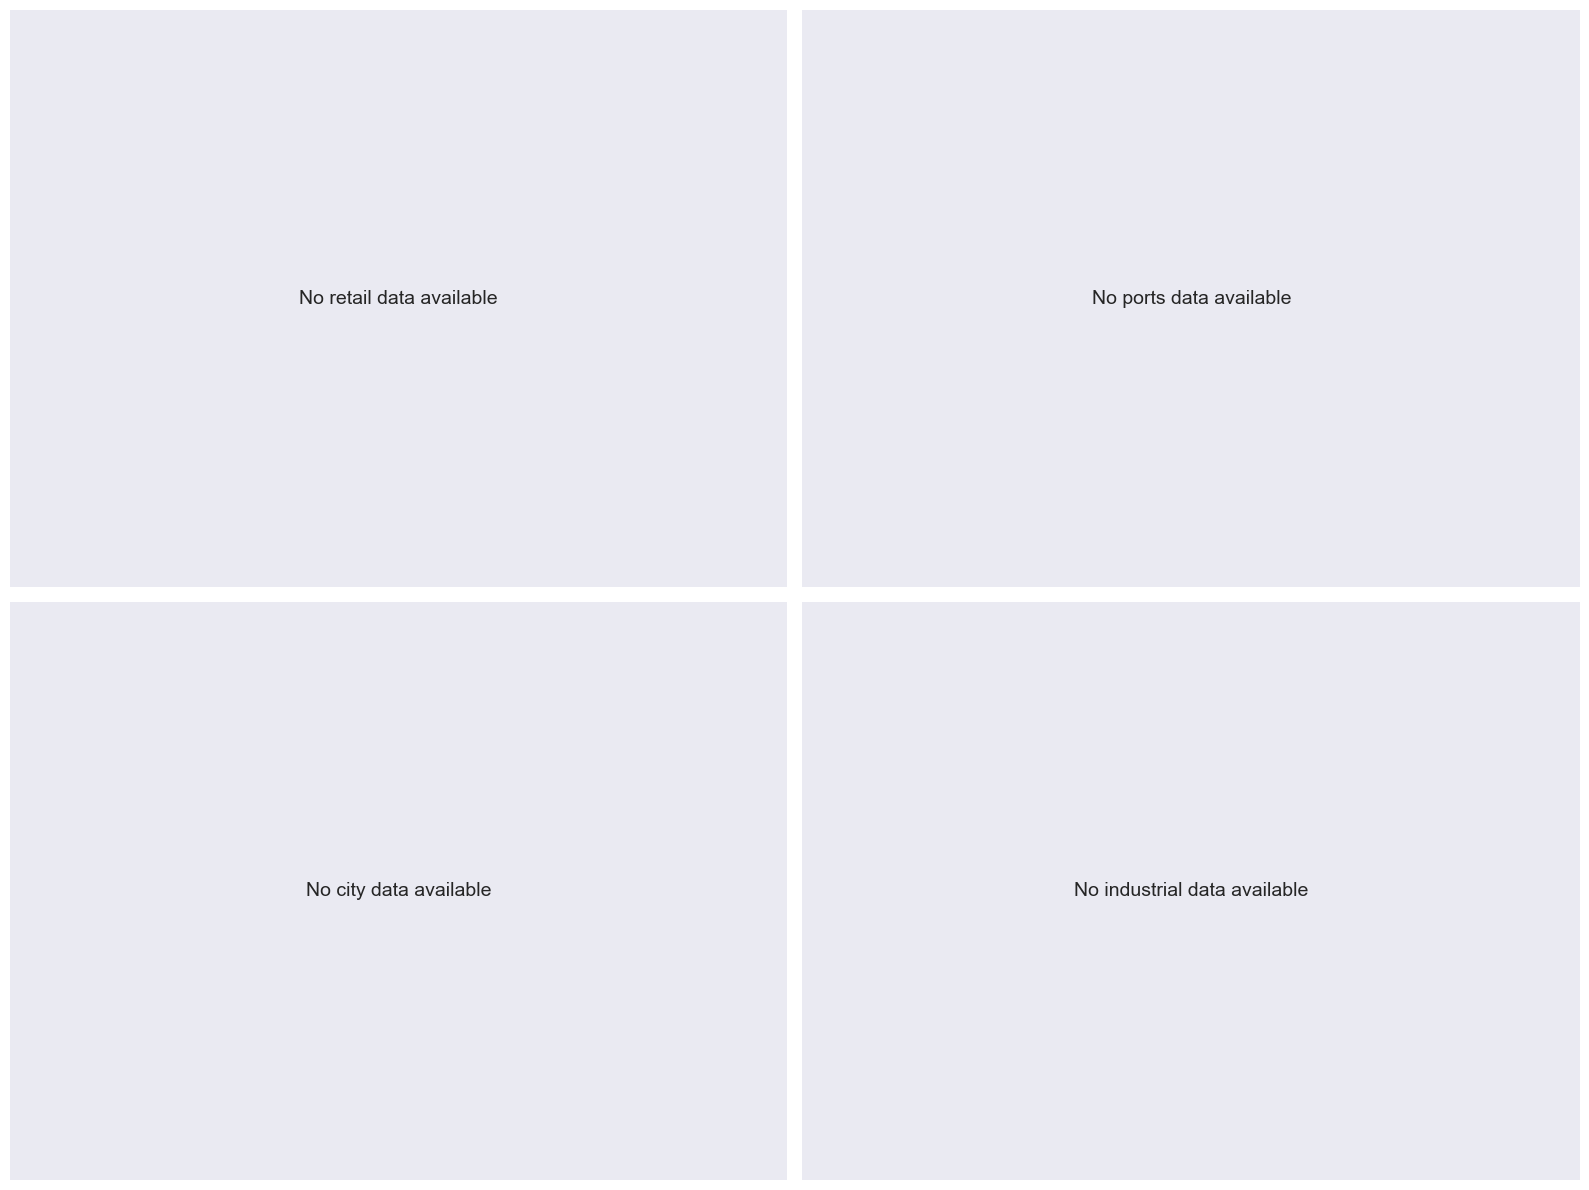

💾 Saved: all_activities_comparison.png


In [25]:
# Compare all activities over time
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

activities = [
    ('retail', retail_df, 'car_count', 'Retail Activity (Cars)', axes[0, 0], 'steelblue'),
    ('ports', ports_df, 'ship_count', 'Port Activity (Ships)', axes[0, 1], 'navy'),
    ('city', city_df, 'vehicle_density', 'City Activity (Vehicles)', axes[1, 0], 'darkgreen'),
    ('industrial', industrial_df, 'industrial_activity_index', 'Industrial Activity', axes[1, 1], 'darkred'),
]

for name, df, metric, title, ax, color in activities:
    if not df.empty and metric in df.columns:
        yearly = df.groupby('year')[metric].mean()
        ax.plot(yearly.index, yearly.values, 'o-', linewidth=2, markersize=8, color=color)
        ax.set_xlabel('Year', fontsize=12)
        ax.set_ylabel(f'Average {metric.replace("_", " ").title()}', fontsize=12)
        ax.set_title(title, fontsize=14, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.axvspan(2020, 2021, alpha=0.2, color='red')
    else:
        ax.text(0.5, 0.5, f'No {name} data available', 
                ha='center', va='center', transform=ax.transAxes, fontsize=14)
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'all_activities_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"💾 Saved: all_activities_comparison.png")

## 7. Final Summary

In [27]:
print("\n" + "="*80)
print("🎉 ANALYSIS COMPLETE!")
print("="*80)

print(f"\n📁 Visualizations saved to: {OUTPUT_DIR}")
print(f"\nGenerated files:")
for file in sorted(OUTPUT_DIR.glob("*.png")):
    print(f"  ✅ {file.name}")

print("\n" + "="*80)
print("📊 NEXT STEPS:")
print("="*80)
print("1. Review generated charts")
print("2. Download economic indicators (FRED, World Bank)")
print("3. Align satellite metrics with economic data")
print("4. Train forecasting models")
print("5. Generate economic predictions!")
print("="*80 + "\n")


🎉 ANALYSIS COMPLETE!

📁 Visualizations saved to: D:\MS\UMD\Courses\Fall-2025\DATA-650\Real-Time-Economic-Forecasting\results\activity_analysis

Generated files:
  ✅ all_activities_comparison.png

📊 NEXT STEPS:
1. Review generated charts
2. Download economic indicators (FRED, World Bank)
3. Align satellite metrics with economic data
4. Train forecasting models
5. Generate economic predictions!

